## Predictive Analytics for Stroke Risk Detection

In [1]:
import pandas as pd

In [2]:
# Import file from my github link

file_url = "https://raw.githubusercontent.com/Moyoshabz/StrokePredictionAnalysisDetection/refs/heads/main/strokedata.csv"

# Load the CSV file into a DataFrame
df = pd.read_csv(file_url)

# Display the first few rows
print(df.head())


      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


## Exploratory Data Analysis EDA

In [3]:
total_records = df.shape[0]
print(f"Total number of records: {total_records}")

Total number of records: 5110


In [4]:
#Understanding the data type

print(df.dtypes)

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


In [5]:
# Drop the ID column

df = df.drop(columns=["id"])

In [6]:
print(df.dtypes)

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


In [7]:
#Summary Statistics on the dataset 
print(df.describe())

               age  hypertension  heart_disease  avg_glucose_level  \
count  5110.000000   5110.000000    5110.000000        5110.000000   
mean     43.226614      0.097456       0.054012         106.147677   
std      22.612647      0.296607       0.226063          45.283560   
min       0.080000      0.000000       0.000000          55.120000   
25%      25.000000      0.000000       0.000000          77.245000   
50%      45.000000      0.000000       0.000000          91.885000   
75%      61.000000      0.000000       0.000000         114.090000   
max      82.000000      1.000000       1.000000         271.740000   

               bmi       stroke  
count  4909.000000  5110.000000  
mean     28.893237     0.048728  
std       7.854067     0.215320  
min      10.300000     0.000000  
25%      23.500000     0.000000  
50%      28.100000     0.000000  
75%      33.100000     0.000000  
max      97.600000     1.000000  


In [8]:
# Next we will encode the categorical variables

categorical = ['gender' ,'ever_married','work_type','Residence_type','smoking_status']
numerical = ['age', 'hypertension', 'heart_disease','avg_glucose_level', 'bmi']

print('work_type : ', df['work_type'].unique())
print('gender : ', df['gender'].unique())
print('Residence_type : ', df['Residence_type'].unique())
print('ever"_married : ', df['ever_married'].unique())
print('smoking_status : ', df['smoking_status'].unique())

work_type :  ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
gender :  ['Male' 'Female']
Residence_type :  ['Urban' 'Rural']
ever"_married :  ['Yes' 'No']
smoking_status :  ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [9]:
!pip install numpy==1.21.0

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder() 

smoking_status = le.fit_transform(df['smoking_status'])
gender = le.fit_transform(df['gender'])
ever_married = le.fit_transform(df['ever_married'])
Residence_type = le.fit_transform(df['Residence_type'])
work_type = le.fit_transform(df['work_type'])

In [11]:

df['work_type'] = work_type
df['gender'] = gender
df['Residence_type'] = Residence_type
df['ever_married'] = ever_married
df['smoking_status'] = smoking_status

#Viewing the encoded categories
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,NaN,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.6,1,0


In [12]:
#Observing the columns with null

print(df.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [13]:
# The BMI COLUMN according to our analysis shows 201 null data, to rectify this, we would use median imputation to fix this

median_bmi = df["bmi"].median()
df["bmi"] = df["bmi"].fillna(median_bmi)

In [14]:
print(df.isnull().sum())

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [15]:
#overview of our data

print(df.head(10))

   gender   age  hypertension  heart_disease  ever_married  work_type  \
0       1  67.0             0              1             1          2   
1       0  61.0             0              0             1          3   
2       1  80.0             0              1             1          2   
3       0  49.0             0              0             1          2   
4       0  79.0             1              0             1          3   
5       1  81.0             0              0             1          2   
6       1  74.0             1              1             1          2   
7       0  69.0             0              0             0          2   
8       0  59.0             0              0             1          2   
9       0  78.0             0              0             1          2   

   Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0               1             228.69  36.6               1       1  
1               0             202.21  28.1               2

In [16]:
#Correlation analysis 

spearman_corr = df.corr(method='spearman')
print(spearman_corr)

                     gender       age  hypertension  heart_disease  \
gender             1.000000 -0.019268      0.021275       0.085717   
age               -0.019268  1.000000      0.280647       0.269627   
hypertension       0.021275  0.280647      1.000000       0.108306   
heart_disease      0.085717  0.269627      0.108306       1.000000   
ever_married      -0.029936  0.664408      0.164243       0.114644   
work_type          0.053714 -0.279676     -0.034279      -0.016455   
Residence_type    -0.005937  0.014158     -0.007913       0.003092   
avg_glucose_level  0.048641  0.145168      0.114041       0.106360   
bmi                0.002454  0.362859      0.159703       0.062685   
smoking_status    -0.062586  0.233404      0.108804       0.046829   
stroke             0.009117  0.249531      0.127904       0.134914   

                   ever_married  work_type  Residence_type  avg_glucose_level  \
gender                -0.029936   0.053714       -0.005937           0.048641 

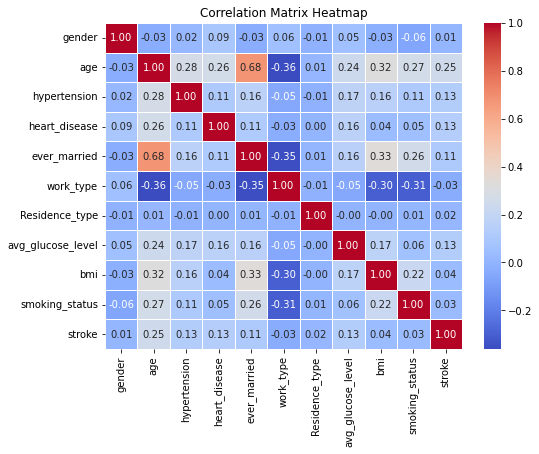

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")

# Showing the plot
plt.show()


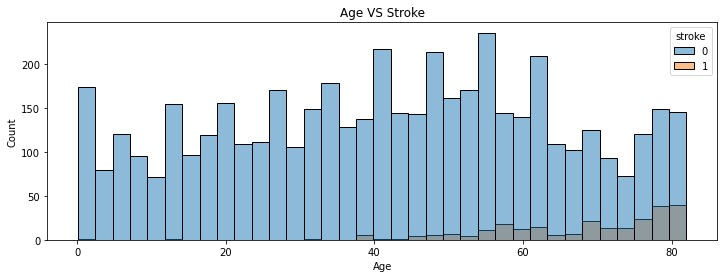

In [18]:
#visualization
# According to the CDC Stroke risk increases with age, we would like to understand the age distribution 
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
pl = sns.histplot(x='age', data=df, hue='stroke', bins=35 )
pl.set_title('Age vs Stroke')
plt.title("Age VS Stroke")
plt.xlabel("Age")
plt.ylabel("Count")

plt.show()

Text(0.5, 1.0, 'Stroke vs BMI')

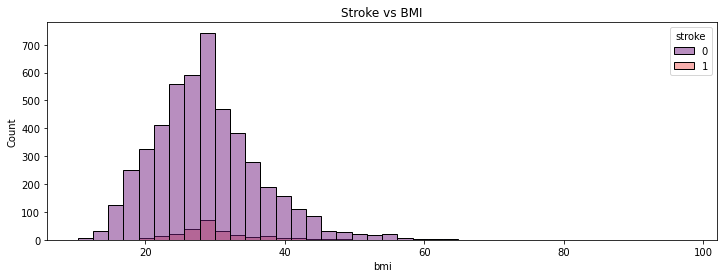

In [19]:
plt.figure(figsize=(12,4))
pl = sns.histplot(x='bmi', data=df, hue='stroke', bins=40, palette='magma')
pl.set_title('Stroke vs BMI')

## Understanding the stroke column data

In [20]:
stroke_counts = df["stroke"].value_counts()

# Display the counts
print("Count of each value in 'Stroke' column:")
print(stroke_counts)

Count of each value in 'Stroke' column:
0    4861
1     249
Name: stroke, dtype: int64


### From this we see, that we have more "0" than "1" This indicates an imbalance in the dataset. This imbalance could lead to underfitting if used as-is for prediction

## Model

#### Below are the models that would be used in this project

### XGBoost, Decision Tree, and Random Forest

### Applying SMOTE 


In [21]:
from imblearn.over_sampling import SMOTE
datax = df.copy()
X = df.drop('stroke', axis = 1)
Y = df['stroke']
Y = pd.DataFrame(Y)

In [22]:
# Applying SMOTE to creates synthetic samples of the minority class '1'

smote_Tech = SMOTE(random_state = 10)
X1, Y1 = smote_Tech.fit_resample(X, Y)
Y.value_counts()

stroke
0         4861
1          249
dtype: int64

In [23]:
#
Y1 = pd.DataFrame(Y1)
X1 = pd.DataFrame(X1)
Y1.value_counts()

stroke
0         4861
1         4861
dtype: int64

In [24]:
# Splitting our dataset into training and tetsing , using the 80%:20%

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X1,Y1,test_size=0.2 ,random_state = 105)
Y_train.value_counts()

stroke
0         3892
1         3885
dtype: int64

### 1. XGBOOST MODEL

In [25]:
#Importing xgboost library

import xgboost as xgb
from sklearn.metrics import accuracy_score

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, Y_train)

#Lets make prediction
predictions = xgb_model.predict(X_test)

#Computing the accuracy score for our model
accuracy = accuracy_score(Y_test, predictions)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 96.04%


In [26]:
feature_names = X_train.columns

# Lets retrieve feature importance to the scores
importance_scores = xgb_model.feature_importances_

#Lets display the result
print("Feature Names:", feature_names.tolist())  
print("Importance Scores:", importance_scores)


Feature Names: ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']
Importance Scores: [0.09453575 0.15987307 0.11604743 0.12104237 0.10832491 0.14218347
 0.0832607  0.05631174 0.04978511 0.06863546]


In [27]:

from sklearn.metrics import confusion_matrix, classification_report

#Generating confusion Matrix
conf_matrix = confusion_matrix(Y_test, predictions)

# Display the confusion Matrix
print("Confusion Matrix:\n", conf_matrix)


# Extract key values
true_positive = conf_matrix[1][1]
true_negative = conf_matrix[0][0]
false_positive = conf_matrix[0][1]
false_negative = conf_matrix[1][0]

print(f"True Positives: {true_positive}")
print(f"True Negatives: {true_negative}")
print(f"False Positives: {false_positive}")
print(f"False Negatives: {false_negative}")

print("\nClassification Report:\n", classification_report(Y_test, predictions))

specificity_score = true_negative / (true_negative + false_positive)
print(f"Specificity: {specificity_score:.4f}")


Confusion Matrix:
 [[931  38]
 [ 39 937]]
True Positives: 937
True Negatives: 931
False Positives: 38
False Negatives: 39

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       969
           1       0.96      0.96      0.96       976

    accuracy                           0.96      1945
   macro avg       0.96      0.96      0.96      1945
weighted avg       0.96      0.96      0.96      1945

Specificity: 0.9608


In [28]:
from sklearn.metrics import roc_curve, roc_auc_score

probabilities = xgb_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, probabilities)

auc_score = roc_auc_score(Y_test, probabilities)
print(f"ROC AUC Score for XGBoost: {auc_score:.4f}")


ROC AUC Score for XGBoost: 0.9914


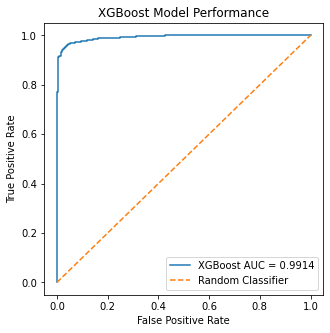

In [29]:
import matplotlib.pyplot as plt

# Plot ROC Curve
plt.figure(figsize=(5,5))
plt.title('XGBoost Model Performance')
plt.plot(fpr, tpr, label=f'XGBoost AUC = {auc_score:.4f}')
plt.plot([0, 1], ls="--", label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


### 2. DECISION TREE

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, Y_train)

dt_predictions = dt_model.predict(X_test)

dt_accuracy = accuracy_score(Y_test, dt_predictions)
print(f"Decision Tree Accuracy: {dt_accuracy * 100:.2f}%")

conf_matrix_dt = confusion_matrix(Y_test, dt_predictions)
print("\nConfusion Matrix:\n", conf_matrix_dt)

print("\nClassification Report:\n", classification_report(Y_test, dt_predictions))

dt_probabilities = dt_model.predict_proba(X_test)[:, 1]


fpr_dt, tpr_dt, thresholds_dt = roc_curve(Y_test, dt_probabilities)
auc_dt = roc_auc_score(Y_test, dt_probabilities)

print(f"ROC AUC Score for Decision Tree: {auc_dt:.4f}")

Decision Tree Accuracy: 91.72%

Confusion Matrix:
 [[886  83]
 [ 78 898]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.92       969
           1       0.92      0.92      0.92       976

    accuracy                           0.92      1945
   macro avg       0.92      0.92      0.92      1945
weighted avg       0.92      0.92      0.92      1945

ROC AUC Score for Decision Tree: 0.9172


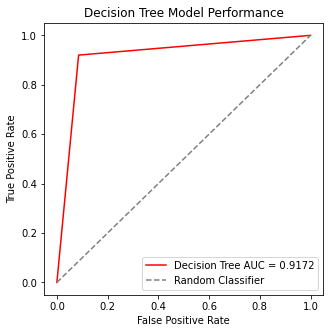

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.title('Decision Tree Model Performance')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree AUC = {auc_dt:.4f}', color='red')
plt.plot([0, 1], ls="--", label='Random Classifier', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

## RANDOM FOREST

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix, classification_report

# Train Random Forest Model
RF = RandomForestClassifier(n_estimators=1000, random_state=47, n_jobs=3)
RF.fit(X_train, Y_train)

# Predict class labels
Y_Res_RF = RF.predict(X_test)

# Predict probabilities for ROC AUC (use probability for the positive class, i.e., 1)
RF_probs = RF.predict_proba(X_test)[:, 1]

# Calculate Accuracy
RF_Accuracy = accuracy_score(Y_test, Y_Res_RF)
print(f"Accuracy: {RF_Accuracy * 100:.2f}%")

# Compute Confusion Matrix
CM = confusion_matrix(Y_test, Y_Res_RF)
print("Confusion Matrix:\n", CM)
print(f"True Positives: {CM[1][1]}")
print(f"True Negatives: {CM[0][0]}")
print(f"False Positives: {CM[0][1]}")
print(f"False Negatives: {CM[1][0]}")

# Compute Classification Report
print("\nClassification Report:\n", classification_report(Y_test, Y_Res_RF))

# Compute Specificity
specificity = CM[0][0] / (CM[0][0] + CM[0][1])
print(f"Specificity: {specificity:.4f}")

# Compute ROC Curve and AUC Score
fpr, tpr, thresholds = roc_curve(Y_test, RF_probs)
auc_score = roc_auc_score(Y_test, RF_probs)
print(f"ROC AUC Score for Random Forest: {auc_score:.4f}")


C:\Users\moyos\AppData\Local\Temp\ipykernel_32196\268753815.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(X_train, Y_train)


Accuracy: 94.09%
Confusion Matrix:
 [[901  68]
 [ 47 929]]
True Positives: 929
True Negatives: 901
False Positives: 68
False Negatives: 47

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       969
           1       0.93      0.95      0.94       976

    accuracy                           0.94      1945
   macro avg       0.94      0.94      0.94      1945
weighted avg       0.94      0.94      0.94      1945

Specificity: 0.9298
ROC AUC Score for Random Forest: 0.9891


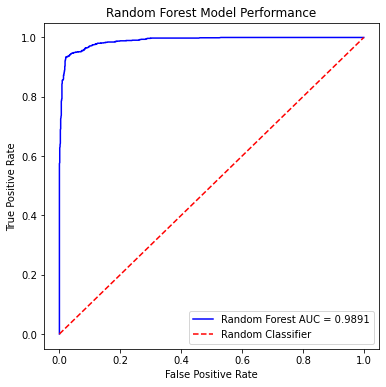

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.title('Random Forest Model Performance')
plt.plot(fpr, tpr, label=f'Random Forest AUC = {auc_score:.4f}', color='blue')
plt.plot([0, 1], [0, 1], ls="--", color='red', label='Random Classifier')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

### Model Comparison & Analysis

#### Comparing all 3 models to select the best performing model

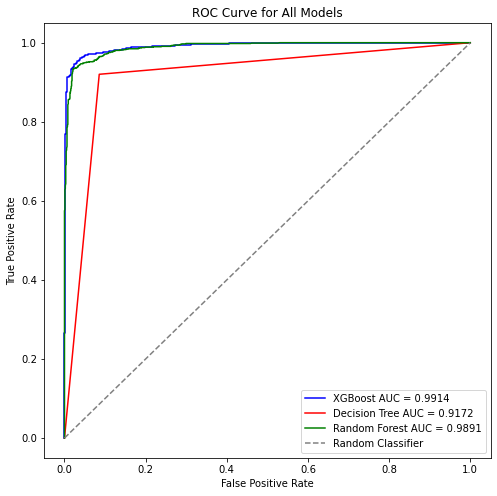

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Getting the predicted probabilities for the positive
prob_xgboost = xgb_model.predict_proba(X_test)[:, 1]
prob_dtc = dt_model.predict_proba(X_test)[:, 1]
prob_rf = RF.predict_proba(X_test)[:, 1]

# Computing the ROC Curve for all 3 model
fpr_xgboost, tpr_xgboost, _ = roc_curve(Y_test, prob_xgboost)
fpr_dtc, tpr_dtc, _ = roc_curve(Y_test, prob_dtc)
fpr_rf, tpr_rf, _ = roc_curve(Y_test, prob_rf)

# Calculating the Area under the curve for all 3 model
auc_xgboost = roc_auc_score(Y_test, prob_xgboost)
auc_dtc = roc_auc_score(Y_test, prob_dtc)
auc_rf = roc_auc_score(Y_test, prob_rf)

#Plotting all 3 model
plt.figure(figsize=(8, 8))
plt.title('ROC Curve for All Models')
plt.plot(fpr_xgboost, tpr_xgboost, label=f'XGBoost AUC = {auc_xgboost:.4f}', color='blue')
plt.plot(fpr_dtc, tpr_dtc, label=f'Decision Tree AUC = {auc_dtc:.4f}', color='red')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest AUC = {auc_rf:.4f}', color='green')
plt.plot([0, 1], [0, 1], ls="--", label='Random Classifier', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


### Model deployment and implementation 

In [35]:
# we will save our xgboost model using joblib

import joblib
joblib.dump(xgb_model, 'xgb_model.pkl')

['xgb_model.pkl']

## Creating our UI using Gradio Framework

In [36]:
#Install !pip install gradio
!pip install gradio

In [37]:
import joblib
import gradio as gr
import pandas as pd

# Load the saved XGBoost model we saved earlier
model = joblib.load('xgb_model.pkl')

# Define the encoding mappings
encoding_mappings = {
    'gender': {'Male': 1, 'Female': 0},
    'ever_married': {'Yes': 1, 'No': 0},
    'Residence_type': {'Urban': 1, 'Rural': 0},
    'smoking_status': {'formerly smoked': 1, 'never smoked': 2, 'smokes': 3},
    'work_type': {'Private': 2, 'Self-employed': 3, 'Govt_job': 0, 'children': 4, 'Never_worked': 1}
}

# Function to preprocess input data
def preprocess_input(gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status):
    # Create a dictionary from the input
    input_data = {
        'gender': gender,
        'age': age,
        'hypertension': hypertension,
        'heart_disease': heart_disease,
        'ever_married': ever_married,
        'work_type': work_type,
        'Residence_type': Residence_type,
        'avg_glucose_level': avg_glucose_level,
        'bmi': bmi,
        'smoking_status': smoking_status
    }
    
    # Convert the dictionary to a DataFrame
    input_df = pd.DataFrame([input_data])
    
    # Encode categorical variables using the predefined mappings
    input_df['gender'] = input_df['gender'].map(encoding_mappings['gender'])
    input_df['ever_married'] = input_df['ever_married'].map(encoding_mappings['ever_married'])
    input_df['Residence_type'] = input_df['Residence_type'].map(encoding_mappings['Residence_type'])
    input_df['smoking_status'] = input_df['smoking_status'].map(encoding_mappings['smoking_status'])
    input_df['work_type'] = input_df['work_type'].map(encoding_mappings['work_type'])
    
    return input_df

# Function to make predictions
def predict_stroke(gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status):
    # Preprocess the input data
    input_df = preprocess_input(gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status)
    
    # Make prediction using the loaded model
    prediction = model.predict(input_df)
    
    # Customizing our UI so it shows more useful information in our response
    if prediction[0] == 1:
        response = "🚨 **There is a potential risk of stroke.** Please consult a healthcare professional immediately."
    else:
        response = "✅ **No significant risk of stroke detected.** Maintain a healthy lifestyle to stay safe."
    
    # Add confidence message
    response += "\n\nThis prediction is based on a highly accurate machine learning model with 96% accuracy."
    
    return response

# Defining the Gradio interface with improved UI
with gr.Blocks(theme=gr.themes.Soft()) as demo:
    gr.Markdown("# Shabz Lab - Stroke Risk Assessment")
    gr.Markdown("Welcome to Shabz Lab's Stroke Risk Assessment Tool. Enter the patient's details below to evaluate their risk of stroke.")
    
    with gr.Row():
        gender = gr.Dropdown(choices=['Male', 'Female'], label="Gender")
        age = gr.Number(label="Age")
    with gr.Row():
        hypertension = gr.Radio(choices=[("No", 0), ("Yes", 1)], label="Hypertension")
        heart_disease = gr.Radio(choices=[("No", 0), ("Yes", 1)], label="Heart Disease")
    with gr.Row():
        ever_married = gr.Dropdown(choices=['Yes', 'No'], label="Ever Married")
        work_type = gr.Dropdown(choices=['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'], label="Work Type")
    with gr.Row():
        Residence_type = gr.Dropdown(choices=['Urban', 'Rural'], label="Residence Type")
        avg_glucose_level = gr.Number(label="Average Glucose Level")
    with gr.Row():
        bmi = gr.Number(label="BMI")
        smoking_status = gr.Dropdown(choices=['formerly smoked', 'never smoked', 'smokes'], label="Smoking Status")
    
    output = gr.Markdown(label="Prediction Result")
    
    submit_button = gr.Button("Predict Stroke Risk", variant="primary")
    submit_button.click(
        predict_stroke,
        inputs=[gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status],
        outputs=output
    )

# Launch the interface in the notebook
demo.launch(inline=True)

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
